In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PASCAL_2007)

In [3]:
path.ls()

(#8) [Path('/home/piper/.fastai/data/pascal_2007/train.json'),Path('/home/piper/.fastai/data/pascal_2007/segmentation'),Path('/home/piper/.fastai/data/pascal_2007/test.json'),Path('/home/piper/.fastai/data/pascal_2007/train.csv'),Path('/home/piper/.fastai/data/pascal_2007/test.csv'),Path('/home/piper/.fastai/data/pascal_2007/train'),Path('/home/piper/.fastai/data/pascal_2007/valid.json'),Path('/home/piper/.fastai/data/pascal_2007/test')]

In [4]:
df = pd.read_csv(path/'train.csv')

In [5]:
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [6]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460),
                               batch_tfms=aug_transforms(size=224))

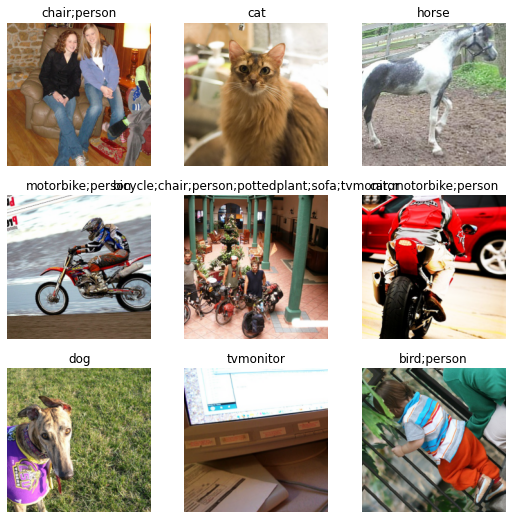

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=0.033113110810518265)

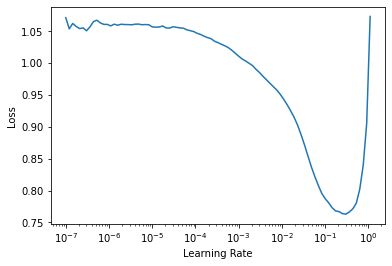

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(2, 3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.432554,0.122814,0.962610,00:36


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.186423,6.851195,0.924343,00:43
1,0.168598,0.133666,0.954442,00:42


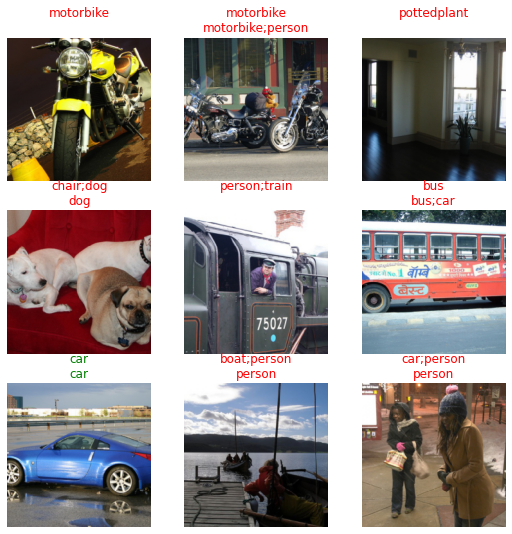

In [11]:
learn.show_results()

,target,predicted,probabilities,loss
0,bus;person,person,"tensor([6.6018e-18, 1.5699e-10, 1.3615e-05, 6.0729e-12, 2.2918e-06, 1.9827e-16,\n 3.5594e-12, 1.6239e-07, 3.3682e-05, 3.4817e-07, 6.2879e-10, 1.1983e-05,\n 7.9665e-11, 1.6436e-09, 1.0000e+00, 2.5190e-05, 9.9950e-13, 7.0646e-06,\n 5.5668e-06, 9.7496e-07])",1.80785071849823
1,bottle;person,person,"tensor([1.2821e-28, 1.0813e-15, 1.2436e-06, 2.9039e-18, 3.9545e-11, 1.1432e-27,\n 3.1066e-19, 2.5640e-10, 4.1507e-08, 3.4052e-08, 2.7294e-15, 1.1832e-07,\n 5.1428e-15, 4.2525e-14, 1.0000e+00, 1.1878e-08, 4.7556e-20, 3.7450e-08,\n 1.5749e-08, 4.9183e-10])",1.1976797580718994
2,bottle;person,person,"tensor([2.1474e-26, 3.0341e-14, 2.6769e-06, 6.1093e-17, 2.1150e-10, 1.7257e-25,\n 1.1961e-17, 1.3179e-09, 1.9338e-07, 1.3140e-07, 3.5129e-14, 6.9440e-07,\n 7.1808e-14, 9.3447e-13, 1.0000e+00, 6.7828e-08, 2.2352e-18, 1.3300e-07,\n 7.7732e-08, 4.9556e-09])",1.1138395071029663
3,bottle;person;tvmonitor,person,"tensor([1.6207e-16, 1.1907e-09, 5.8305e-05, 4.8817e-11, 2.8098e-05, 4.8480e-15,\n 2.5617e-11, 8.7214e-07, 1.7279e-04, 1.7216e-06, 2.0040e-08, 9.8020e-05,\n 5.7828e-10, 3.0078e-08, 1.0000e+00, 2.0806e-04, 2.1835e-11, 4.0491e-05,\n 1.0682e-04, 1.6845e-05])",1.073598861694336
4,bottle;person,person,"tensor([3.6466e-25, 1.3273e-13, 9.6517e-06, 3.8589e-16, 6.1628e-10, 2.7448e-24,\n 6.3603e-17, 7.4582e-09, 3.4925e-07, 5.0931e-07, 1.4698e-13, 1.7195e-06,\n 5.2399e-13, 1.4931e-12, 1.0000e+00, 1.0559e-07, 2.4192e-17, 2.8839e-07,\n 8.9495e-08, 9.2118e-09])",1.0603665113449097
5,chair;person,person,"tensor([1.1097e-29, 2.5859e-16, 5.2368e-07, 1.4456e-18, 6.6796e-13, 8.9434e-29,\n 1.7740e-19, 1.5758e-10, 5.4064e-09, 2.0809e-08, 7.4521e-17, 3.7765e-08,\n 5.3977e-15, 3.8458e-15, 1.0000e+00, 4.9653e-10, 2.4692e-21, 1.5110e-08,\n 8.3389e-10, 4.0898e-11])",0.9517837762832642
6,bottle;person,person,"tensor([8.2378e-24, 1.2994e-13, 9.5484e-07, 1.5390e-15, 8.1880e-09, 1.7894e-22,\n 5.2063e-16, 1.1201e-09, 6.2804e-07, 1.7573e-08, 2.3498e-13, 3.0940e-07,\n 1.3489e-13, 2.9147e-12, 1.0000e+00, 4.8996e-07, 4.1498e-17, 1.6169e-07,\n 1.5935e-07, 8.5027e-09])",0.9310299158096313
7,horse;person,bird;pottedplant,"tensor([1.3338e-04, 2.2111e-03, 5.1716e-01, 5.2164e-04, 3.7387e-03, 5.6101e-06,\n 2.7359e-03, 8.8624e-03, 1.9963e-03, 6.6009e-05, 7.5660e-04, 1.4941e-04,\n 1.7714e-04, 1.5136e-05, 1.8581e-03, 5.5551e-01, 1.2589e-03, 8.4091e-04,\n 7.2727e-04, 1.1004e-04])",0.8244900107383728
8,bottle;diningtable;person,person,"tensor([4.2764e-13, 3.3961e-08, 8.6964e-05, 3.7367e-09, 1.2721e-02, 1.0742e-11,\n 1.0354e-09, 8.7261e-06, 1.9312e-03, 9.5179e-07, 6.5658e-06, 9.0495e-05,\n 4.3778e-09, 9.6378e-07, 1.0000e+00, 4.2421e-03, 1.1931e-09, 1.8499e-04,\n 1.1524e-03, 1.3282e-04])",0.8153002858161926


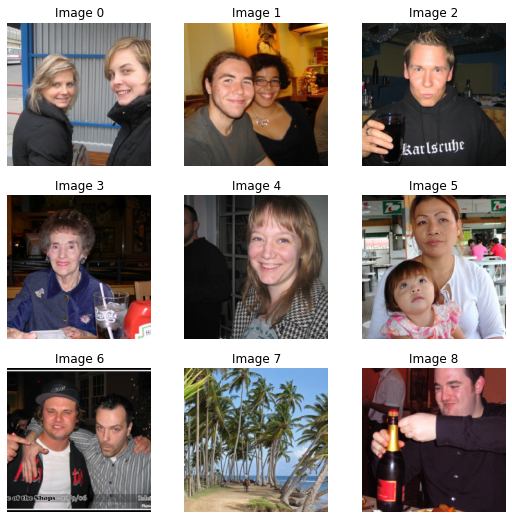

In [12]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)